In [1]:
#글꼴 설치 - 실행 후 런타임 다시 시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,059 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

In [1]:
!pip install factor_analyzer # https://pypi.org/project/factor-analyzer/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#구글 코랩 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

from factor_analyzer import FactorAnalyzer

pd.options.display.max_columns = None

plt.rcParams['axes.unicode_minus'] = False

## Dataset Loading & Preprocessing

In [4]:
# 데이터셋 경로 지정
ROOT = '/content/drive/MyDrive/Colab Notebooks/DM/HW' 
data = pd.read_csv(f'{ROOT}/논문참조_data.csv', encoding = 'cp949')

In [5]:
data['날짜'] = data['날짜'].astype('datetime64[ns]')

In [6]:
data.head()

,날짜,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),평균기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),1시간 최다일사량(MJ/m2),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),9-9강수(mm),안개 계속시간(hr),미세먼지_기준,초미세먼지_기준,강수여부,적설여부,안개여부,휴일여부,따릉이
0,2019-01-01,0.033,0.016,0.5,0.003,42,27,-5.0,-0.6,0.0,4.3,2.1,34,49.5,9.6,7.5,1.42,7.84,0.0,3.4,0.0,0.0,2,2,0,0,0,1,8601
1,2019-01-02,0.043,0.010,0.6,0.004,36,24,-4.9,0.2,0.0,3.6,1.7,20,42.8,9.6,8.7,1.81,10.48,0.0,0.0,0.0,0.0,2,2,0,0,0,0,14360
2,2019-01-03,0.049,0.008,0.6,0.004,33,22,-3.5,3.2,0.0,2.9,1.4,18,38.8,9.7,8.7,1.79,10.28,0.0,0.1,0.0,0.0,2,2,0,0,0,0,16344
3,2019-01-04,0.065,0.005,1.0,0.005,55,42,-1.1,4.1,0.0,3.0,1.2,34,55.5,9.7,3.9,1.27,6.20,0.0,5.5,0.0,0.0,2,3,0,0,0,0,17308
4,2019-01-05,0.034,0.017,0.6,0.004,60,41,-2.8,1.1,0.0,4.3,2.2,20,40.3,9.7,8.6,1.78,10.05,0.0,0.5,0.0,0.0,2,3,0,0,0,1,12380


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   날짜                365 non-null    datetime64[ns]
 1   이산화질소농도(ppm)      365 non-null    float64       
 2   오존농도(ppm)         365 non-null    float64       
 3   이산화탄소농도(ppm)      365 non-null    float64       
 4   아황산가스(ppm)        365 non-null    float64       
 5   미세먼지(㎍/㎥)         365 non-null    int64         
 6   초미세먼지(㎍/㎥)        365 non-null    int64         
 7   평균기온(°C)          365 non-null    float64       
 8   최고기온(°C)          365 non-null    float64       
 9   일강수량(mm)          365 non-null    float64       
 10  최대 풍속(m/s)        365 non-null    float64       
 11  평균 풍속(m/s)        365 non-null    float64       
 12  최소 상대습도(%)        365 non-null    int64         
 13  평균 상대습도(%)        365 non-null    float64       
 14  가조시간(hr)          365 non-

In [8]:
type = ["float64", "int64", "object"]
data.describe(include = type)

,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),평균기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),1시간 최다일사량(MJ/m2),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),9-9강수(mm),안개 계속시간(hr),미세먼지_기준,초미세먼지_기준,강수여부,적설여부,안개여부,휴일여부,따릉이
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.030026,0.024042,0.470411,0.003345,43.216438,26.328767,13.598904,18.602192,2.441918,4.286849,1.954247,34.753425,56.806301,12.203836,6.979315,2.123822,13.834219,0.019726,4.899178,2.441918,0.023233,1.778082,2.002740,0.268493,0.010959,0.010959,0.317808,52346.005479
std,0.013313,0.012134,0.171775,0.000859,24.809931,18.804996,10.184196,10.335448,8.152076,1.072120,0.595325,14.822930,15.450840,1.788804,3.991951,0.786749,6.875198,0.217617,2.979421,7.505520,0.295512,0.586067,0.716749,0.443784,0.104252,0.104252,0.466264,27256.890686
min,0.008000,0.003000,0.200000,0.002000,8.000000,3.000000,-7.900000,-4.500000,0.000000,1.800000,0.900000,10.000000,24.300000,9.600000,0.000000,0.100000,0.540000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,0.019750,0.014000,0.400000,0.003000,28.000000,16.000000,4.300000,9.300000,0.000000,3.500000,1.600000,22.000000,45.400000,10.500000,3.300000,1.630000,8.910000,0.000000,2.300000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,26046.000000
50%,0.027000,0.023000,0.400000,0.003000,37.000000,22.000000,14.700000,20.200000,0.000000,4.200000,1.900000,34.000000,57.300000,12.200000,8.100000,2.150000,13.090000,0.000000,4.900000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,54162.000000
75%,0.039000,0.034000,0.600000,0.004000,51.000000,32.000000,23.000000,27.800000,0.200000,4.900000,2.300000,43.000000,67.300000,13.900000,9.900000,2.720000,18.830000,0.000000,7.500000,0.200000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,78874.000000
max,0.071000,0.059000,1.300000,0.006000,183.000000,137.000000,31.600000,36.800000,63.200000,11.800000,6.000000,91.000000,95.300000,14.800000,13.600000,3.590000,28.890000,3.300000,10.000000,49.600000,5.330000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,95859.000000


In [9]:
# 범주형 데이터 제거
df = data.drop(['날짜', '강수여부', '적설여부', '안개여부', '휴일여부', '미세먼지_기준', '초미세먼지_기준', '따릉이'], axis = 1)

In [10]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns, index = df.index)

In [11]:
#z-표준화한 결과의 평균
data_scale.mean(axis=0)

이산화질소농도(ppm)        2.725369e-16
오존농도(ppm)          -3.504046e-16
이산화탄소농도(ppm)        2.336031e-16
아황산가스(ppm)          0.000000e+00
미세먼지(㎍/㎥)           5.840077e-17
초미세먼지(㎍/㎥)         -7.786770e-17
평균기온(°C)           -1.168015e-16
최고기온(°C)           -7.786770e-17
일강수량(mm)            4.866731e-17
최대 풍속(m/s)          7.592100e-16
평균 풍속(m/s)          2.530700e-16
최소 상대습도(%)          0.000000e+00
평균 상대습도(%)         -7.786770e-17
가조시간(hr)            9.344124e-16
합계 일조시간(hr)        -1.557354e-16
1시간 최다일사량(MJ/m2)    3.893385e-17
합계 일사량(MJ/m2)       0.000000e+00
일 최심적설(cm)          1.946692e-17
평균 전운량(1/10)        9.733462e-17
9-9강수(mm)           3.893385e-17
안개 계속시간(hr)         1.460019e-17
dtype: float64

In [12]:
data_scale.cov() # 공분산행렬 구하기

,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),평균기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),가조시간(hr),합계 일조시간(hr),1시간 최다일사량(MJ/m2),합계 일사량(MJ/m2),일 최심적설(cm),평균 전운량(1/10),9-9강수(mm),안개 계속시간(hr)
이산화질소농도(ppm),1.002747,-0.479805,0.875023,0.636469,0.586994,0.585994,-0.552087,-0.506014,-0.168632,-0.312439,-0.409565,-0.302299,-0.289128,-0.564911,-0.056933,-0.260038,-0.262962,0.082928,-0.110287,-0.146612,0.054155
오존농도(ppm),-0.479805,1.002747,-0.366542,-0.015424,-0.007477,-0.013160,0.447714,0.476412,-0.080220,0.218184,0.121823,-0.181099,-0.133200,0.723801,0.352785,0.587106,0.648637,-0.067398,-0.088165,-0.110472,-0.076593
이산화탄소농도(ppm),0.875023,-0.366542,1.002747,0.622325,0.740222,0.778581,-0.524038,-0.491239,-0.183599,-0.240263,-0.321220,-0.206066,-0.170662,-0.562921,-0.074356,-0.261310,-0.282696,0.054758,-0.111846,-0.166424,0.075593
아황산가스(ppm),0.636469,-0.015424,0.622325,1.002747,0.598414,0.569276,-0.356162,-0.302356,-0.276003,-0.047398,-0.176370,-0.413934,-0.444269,-0.284892,0.186254,0.030815,0.054467,0.009058,-0.236514,-0.180890,-0.031773
미세먼지(㎍/㎥),0.586994,-0.007477,0.740222,0.598414,1.002747,0.930165,-0.341890,-0.309544,-0.203963,-0.045338,-0.133895,-0.249014,-0.210714,-0.312587,0.004878,-0.071596,-0.090061,0.012828,-0.126894,-0.158852,-0.028442
초미세먼지(㎍/㎥),0.585994,-0.013160,0.778581,0.569276,0.930165,1.002747,-0.301787,-0.280337,-0.165690,-0.123032,-0.211280,-0.140519,-0.097561,-0.269012,-0.065599,-0.118016,-0.131517,0.051452,-0.051769,-0.130500,-0.003008
평균기온(°C),-0.552087,0.447714,-0.524038,-0.356162,-0.341890,-0.301787,1.002747,0.991481,0.191460,-0.158121,-0.148174,0.419619,0.415803,0.826817,0.040693,0.351008,0.402016,-0.120027,0.307456,0.230089,-0.055298
최고기온(°C),-0.506014,0.476412,-0.491239,-0.302356,-0.309544,-0.280337,0.991481,1.002747,0.133412,-0.164970,-0.171975,0.317899,0.329803,0.824704,0.148488,0.445955,0.494525,-0.143604,0.216897,0.175362,-0.056273
일강수량(mm),-0.168632,-0.080220,-0.183599,-0.276003,-0.203963,-0.165690,0.191460,0.133412,1.002747,0.015508,0.023194,0.519090,0.504154,0.145901,-0.390690,-0.338823,-0.302164,0.004780,0.381758,0.673624,0.008872
최대 풍속(m/s),-0.312439,0.218184,-0.240263,-0.047398,-0.045338,-0.123032,-0.158121,-0.164970,0.015508,1.002747,0.819890,-0.123627,-0.122998,-0.086490,0.117586,0.050134,0.050314,-0.025921,-0.156402,0.036566,-0.046323


In [13]:
# PCA 진행 (고유 분해를 통해 고유값과 고유 벡터 계산)
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)

# PCA

## Step 1. PCA의 factor 수 결정

### 방안 1. Eigen value > 1일 때까지 선택

In [14]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [5.87781440e+00 5.13527339e+00 2.60494066e+00 1.58629226e+00
 1.08339945e+00 1.02832970e+00 9.33085744e-01 6.58277111e-01
 5.06875626e-01 3.59697715e-01 2.95035882e-01 2.23952394e-01
 1.90257241e-01 1.34167024e-01 1.07272552e-01 7.86119235e-02
 7.01307015e-02 5.83865588e-02 4.44638243e-02 2.08180140e-02
 2.91783721e-03] 
 number of eigen value: 21
적합한 PC 개수: 6


### 방안 2: Scree plot 그래프 기울기가 완만해지기 전의 값까지 선택

- 5번 째 factor에서 6번 째 factor로 갈 때 기울기가 완만해짐
- 따라서 기울기가 완만해지기 전인 5번 째 factor까지 사용

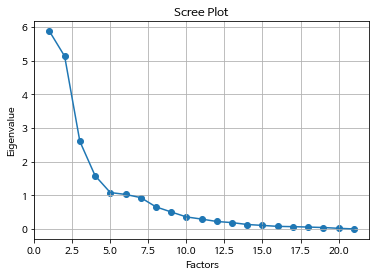

In [15]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

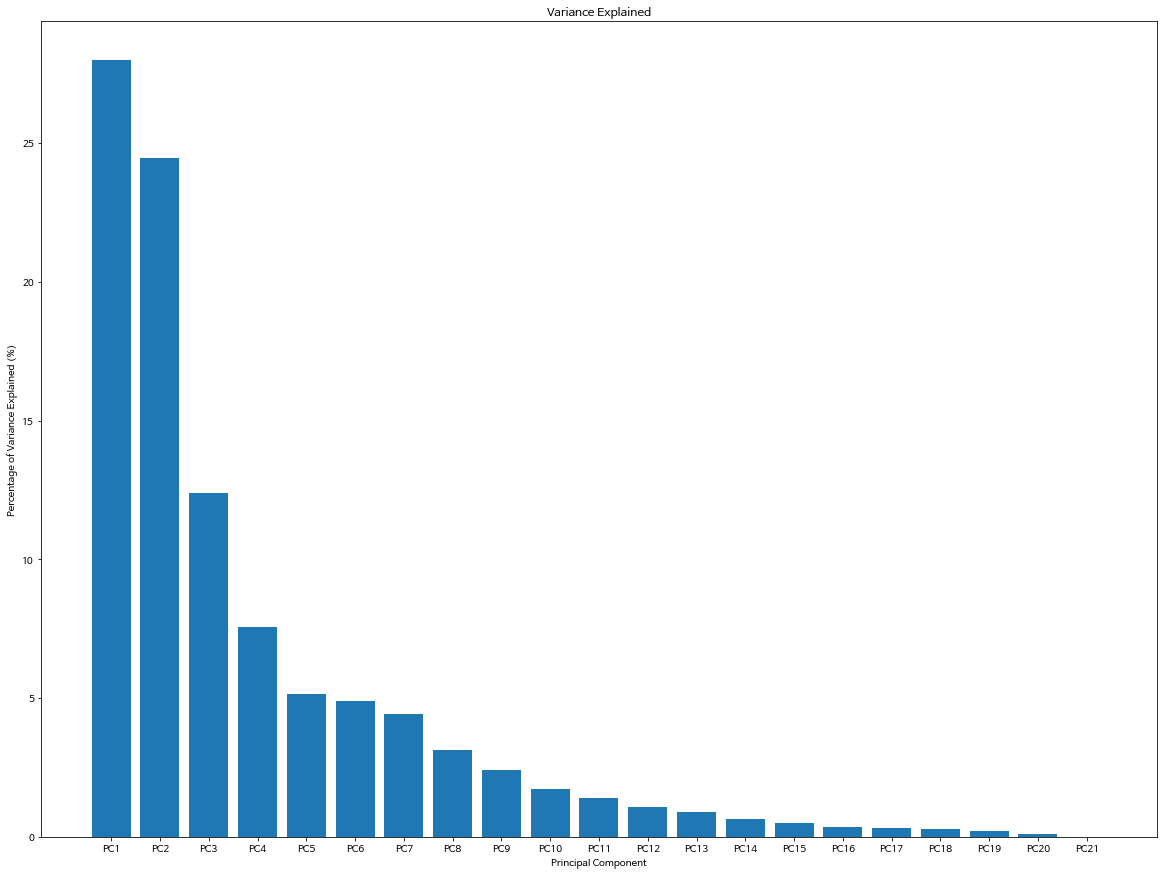

In [16]:
# 시각화 2
each_variance_ratio = pca.explained_variance_ratio_
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

plt.figure(figsize=(20, 15))
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)

plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

### 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [17]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [2.79895924e-01 2.44536828e-01 1.24044793e-01 7.55377266e-02
 5.15904500e-02 4.89680809e-02 4.44326545e-02 3.13465291e-02
 2.41369346e-02 1.71284626e-02 1.40493277e-02 1.06643997e-02
 9.05986860e-03 6.38890590e-03 5.10821675e-03 3.74342493e-03
 3.33955721e-03 2.78031232e-03 2.11732497e-03 9.91334001e-04
 1.38944629e-04]
누적 분산 설명 비율:
 [0.27989592 0.52443275 0.64847754 0.72401527 0.77560572 0.8245738
 0.86900646 0.90035299 0.92448992 0.94161838 0.95566771 0.96633211
 0.97539198 0.98178089 0.9868891  0.99063253 0.99397208 0.9967524
 0.99886972 0.99986106 1.        ]


In [18]:
d = np.argmax(cumsum >= 0.80) +1 #설명 가능한 분산의 비율의 합이 0.8 이상이 되는 값
print('적합한 PC 개수:', d)

적합한 PC 개수: 6


- 그래프의 기울기가 완만해지는 지점은 5번째 factor이나, 6번째 factor까지 igenvalue가 1 이상의 값을 가지며 또한 6번째 factor까지 포함했을 때 설명 가능한 분산의 비율이 0.8 이상이 되므로 factor 수 = 6개로 설정

## Step 2. PCA 진행

In [19]:
# PCA 진행
pca = PCA(n_components=6,random_state=312) # n_components를 재설정
pca_out = pca.fit(data_scale)
X_p = pca.fit_transform(data_scale)

In [20]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Kaiser rule 기준
# PC의 결과(변수별 계수)는 가로 및 세로로 해석
# 가로로 해석하면 해당 변수에서 어떤 주성분이 높게 나왔는지 파악 가능
# 세로로 해석하면 주성분에서 어떤 변수들이 어떤 가중치로 포함되었는지 파악 가능 
pd.DataFrame(pca.components_.T, 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
             index=df.columns)

,PC1,PC2,PC3,PC4,PC5,PC6
이산화질소농도(ppm),0.346618,0.062099,-0.197529,-0.089846,-0.129862,-0.016841
오존농도(ppm),-0.179636,-0.251962,-0.115598,0.365387,0.174302,-0.024036
이산화탄소농도(ppm),0.348779,0.069645,-0.223789,0.082868,-0.034904,0.080598
아황산가스(ppm),0.276826,-0.090698,-0.182169,0.203521,-0.103159,-0.037892
미세먼지(㎍/㎥),0.283449,-0.013585,-0.243908,0.403272,0.051624,0.052131
초미세먼지(㎍/㎥),0.269638,0.021873,-0.295821,0.385436,0.092993,0.055959
평균기온(°C),-0.339944,-0.050321,-0.280908,0.053786,0.019117,0.037544
최고기온(°C),-0.322360,-0.096698,-0.296479,0.040739,-0.006377,0.049856
일강수량(mm),-0.151558,0.236310,-0.002519,0.148141,-0.480592,-0.050012
최대 풍속(m/s),-0.029676,-0.069268,0.432503,0.472617,0.028518,0.051502


In [21]:
# 누적 분산 설명 비율 = PC들이 전체 분산을 얼마나 설명하는지 누적 비율로 나타냄
np.cumsum(pca.explained_variance_ratio_)

array([0.27989592, 0.52443275, 0.64847754, 0.72401527, 0.77560572,
       0.8245738 ])

In [22]:
#정규화된 observation에 각 PC가 얼마나 영향을 주는지 출력
X_pp = pd.DataFrame(X_p, 
                    columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
                    index = data.index)
X_pp

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.271962,0.859127,1.955583,-0.805607,-0.053974,-0.042886
1,3.419612,-0.245713,1.215544,-1.742047,-0.936706,-0.205647
2,3.511271,-0.248265,0.587579,-2.433296,-1.125087,-0.332426
3,4.965181,2.174880,-1.489308,-1.055540,-0.526938,-0.058662
4,3.437423,-0.471820,1.374651,-0.059552,-0.493292,-0.020124
...,...,...,...,...,...,...
360,2.345956,-0.300279,2.019338,-1.157044,-0.535905,-0.032629
361,2.873856,1.034874,0.806869,-1.155156,-0.439519,-0.056182
362,2.136826,3.229242,1.719310,0.217015,0.553901,0.002616
363,1.323629,3.261106,3.182388,1.498414,0.990926,0.301557


### CA 진행 후 다중 선형회귀 - ols 결과 차이 분석

In [23]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#### PCA 진행한 경우

In [24]:
from sklearn.model_selection import train_test_split
 
y = data["따릉이"]

x_cate = data[['미세먼지_기준', '초미세먼지_기준', '강수여부', '적설여부', '안개여부']]
x1 = pd.concat([X_pp, x_cate], axis = 1)

In [25]:
# Train: Test = 8:2 분리
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, train_size=0.8, test_size=0.2, random_state=42)

In [26]:
x1_train_ = sm.add_constant(x1_train, has_constant='add')
df1_ = pd.concat([x1_train, y1_train], axis=1)
df1_ = sm.add_constant(df1_, has_constant='add')
df1_.head()

,const,PC1,PC2,PC3,PC4,PC5,PC6,미세먼지_기준,초미세먼지_기준,강수여부,적설여부,안개여부,따릉이
211,1.0,-5.752790,7.097413,0.418697,2.719462,-5.296577,-0.572996,1,1,1,0,0,26874
340,1.0,3.760502,3.645430,-0.283226,-0.944758,0.149381,0.035532,2,3,1,0,0,23013
202,1.0,-2.591068,0.183005,-1.388151,1.002222,1.290915,0.275098,2,3,1,0,0,82781
75,1.0,0.064592,-1.811512,0.824931,-0.328347,-0.062571,-0.017984,2,2,0,0,0,35622
84,1.0,0.599744,-2.165867,-0.159039,0.653512,-0.134088,-0.007041,2,3,0,0,0,42644


In [27]:
feature_names = x1_train.columns
feature_names_ = [feature for feature in feature_names if not feature in ('미세먼지_기준', '초미세먼지_기준', '강수여부', '적설여부', '안개여부')] + ['C(미세먼지_기준)', 'C(초미세먼지_기준)', 'C(강수여부)', 'C(적설여부)', 'C(안개여부)']
print(len(feature_names_),feature_names_,"\n")

11 ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'C(미세먼지_기준)', 'C(초미세먼지_기준)', 'C(강수여부)', 'C(적설여부)', 'C(안개여부)'] 



In [28]:
fit = ols("따릉이~" + "+".join(feature_names_), data=df1_).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    따릉이   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     38.65
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           6.37e-59
Time:                        03:23:38   Log-Likelihood:                -3228.7
No. Observations:                 292   AIC:                             6489.
Df Residuals:                     276   BIC:                             6548.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.257e+04   3435.580     18.212      0.000    5.58e+04    6.93e+04
C(미세먼지_기준)[T.2]   3967.8955   3210.537      1.236      0.218   -2352.357    1.03e+04
C(미세먼지_기준)[T.3]   3973.8572   6561.332      0.606      0.545   -8942.757    1.69e+04
C(미세먼지_기준)[T.4]   4104.2115   1.61e+04      0.254      0.799   -2.77e+04    3.59e+04
C(초미세먼지_기준)[T.2] -8434.5544   3198.423     -2.637      0.009   -1.47e+04   -2138.151
C(초미세먼지_기준)[T.3] -1.832e+04   5450.999     -3.361      0.001   -2.91e+04   -7591.043
C(초미세먼지_기준)[T.4] -2.606e+04   1.07e+04     -2.435      0.016   -4.71e+04   -4994.915
C(강수여부)[T.1]     -1.458e+04   3115.849     -4.678      0.000   -2.07e+04   -8442.697
C(적설여부)[T.1]     -5543.0080   1.38e+04     -0.403      0.688   -3.27e+04    2.16e+04
C(안개여부)[T.1]      -2.88e+04   1.34e+04     -2.144      0.033   -5.52e+04   -2353.176
PC1              -5869.6178    850.712     -6.900      0.000   -7544.327   -4194.908
PC2              -3307.7048    543.871     -6.082      0.000   -4378.368   -2237.042
PC3              -5276.9144    905.663     -5.827      0.000   -7059.800   -3494.029
PC4               -597.4981   1175.413     -0.508      0.612   -2911.412    1716.415
PC5               4986.6584    992.051      5.027      0.000    3033.710    6939.607
PC6               2720.8409   1367.439      1.990      0.048      28.905    5412.777
==============================================================================
Omnibus:                        6.841   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.846
Skew:                           0.182   Prob(JB):                       0.0886
Kurtosis:                       2.484   Cond. No.                         46.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### PCA 적용 하지 않은 경우

In [29]:
x2 = data.drop(['날짜', '따릉이'], axis = 1)

In [30]:
x2 = x2.rename(columns={'이산화질소농도(ppm)':'이산화질소농도', 
                        '오존농도(ppm)':'오존농도', 
                        '이산화탄소농도(ppm)':'이산화탄소농도', 
                        '아황산가스(ppm)':'아황산가스', 
                        '미세먼지(㎍/㎥)':'미세먼지',
                        '초미세먼지(㎍/㎥)':'초미세먼지', 
                        '최고기온(°C)':'최고기온',
                        '평균기온(°C)':'평균기온', 
                        '일강수량(mm)':'일강수량', 
                        '평균 풍속(m/s)':'평균_풍속',
                        '최대 풍속(m/s)':'최대_풍속',
                        '최소 상대습도(%)':'최소_상대습도',
                        '평균 상대습도(%)':'평균_상대습도',
                        '가조시간(hr)':'가조시간', 
                        '합계 일조시간(hr)':'합계_일조시간',
                        '1시간 최다일사량(MJ/m2)':'시간당_최다일사량',
                        '합계 일사량(MJ/m2)':'합계_일사량', 
                        '일 최심적설(cm)':'일_최심적설', 
                        '평균 전운량(1/10)':'평균_전운량', 
                        '9-9강수(mm)':'강수',
                        '안개 계속시간(hr)':'안개계속시간'})

In [31]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, train_size=0.8, test_size=0.2, random_state=312)

In [32]:
x2_train_ = sm.add_constant(x2_train, has_constant='add') 

In [33]:
### 스케일링
from sklearn.preprocessing import StandardScaler
# 변형 객체 생성
standard_scaler = StandardScaler()

# 훈련데이터의 모수 분포 저장
# 훈련 데이터 스케일링
standard_scaler.fit(x2_train.drop(columns = ["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]))
x2_train_scaled = standard_scaler.transform(x2_train.drop(columns = ["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]))
x2_train_scaled = pd.DataFrame(x2_train_scaled, columns = x2_train.drop(columns = ["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]).columns)
x2_train_scaled.index = x2_train.index
x2_train_scaled = pd.concat([x2_train_scaled, x2_train[["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]]], axis = 1)

# 테스트 데이터의 스케일링
standard_scaler.fit(x2_test.drop(columns = ["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]))
x2_test_scaled = standard_scaler.transform(x2_test.drop(columns = ["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]))
x2_test_scaled = pd.DataFrame(x2_test_scaled, columns = x2_test.drop(columns = ["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]).columns)
x2_test_scaled.index = x2_test.index
x2_test_scaled = pd.concat([x2_test_scaled, x2_test[["휴일여부", "미세먼지_기준", "초미세먼지_기준", "강수여부", "적설여부", "안개여부"]]], axis = 1)

In [34]:
df2_ = pd.concat([x2_train_scaled, y2_train], axis=1)
df2_.head()

,이산화질소농도,오존농도,이산화탄소농도,아황산가스,미세먼지,초미세먼지,평균기온,최고기온,일강수량,최대_풍속,평균_풍속,최소_상대습도,평균_상대습도,가조시간,합계_일조시간,시간당_최다일사량,합계_일사량,일_최심적설,평균_전운량,강수,안개계속시간,휴일여부,미세먼지_기준,초미세먼지_기준,강수여부,적설여부,안개여부,따릉이
40,0.201149,-0.663711,0.164606,0.758437,0.126271,0.103069,-1.878101,-2.040288,-0.317153,-0.646087,-0.411820,-0.875542,-1.667594,-0.912901,-1.169943,-0.675820,-0.853099,-0.092956,0.845892,-0.342953,-0.088088,1,2,2,0,0,0,9759
141,-0.687101,2.298263,-0.407596,0.758437,0.292357,-0.119865,0.553566,0.739814,-0.317153,1.156373,0.806357,-1.072556,-0.722384,1.185618,1.420282,1.617456,1.955087,-0.092956,-1.250536,-0.342953,-0.088088,0,2,2,0,0,0,80735
19,-0.687101,0.159060,0.164606,0.758437,0.873659,0.604669,-1.520795,-1.462731,-0.317153,1.256510,2.198560,-1.072556,-1.204634,-1.244247,0.473854,-0.217165,-0.320585,-0.092956,-1.353639,-0.342953,-0.088088,1,2,3,0,0,0,11191
167,-1.131226,0.981830,-0.979797,0.758437,-0.911768,-0.732932,0.771920,0.710446,-0.317153,-0.145404,0.632332,-0.021815,0.119946,1.406515,1.445188,0.997652,1.649570,-0.092956,-0.185138,0.912949,-0.088088,0,1,1,0,0,0,86987
170,-0.835143,1.146384,-0.407596,-1.585093,-0.579596,-0.342798,0.871172,0.867072,-0.317153,-0.045267,-0.063770,0.634897,0.859396,1.406515,0.000640,1.146405,1.014266,-0.092956,1.017731,-0.342953,-0.088088,0,1,2,0,0,0,88226


In [35]:
feature_names = x2_train.columns
feature_names_ = [feature for feature in feature_names if not feature in ('미세먼지_기준', '초미세먼지_기준', '강수여부', '적설여부', '안개여부','휴일여부')] + ['C(미세먼지_기준)', 'C(초미세먼지_기준)', 'C(강수여부)', 'C(적설여부)', 'C(안개여부)', 'C(휴일여부)']
print(len(feature_names_),feature_names_,"\n")

27 ['이산화질소농도', '오존농도', '이산화탄소농도', '아황산가스', '미세먼지', '초미세먼지', '평균기온', '최고기온', '일강수량', '최대_풍속', '평균_풍속', '최소_상대습도', '평균_상대습도', '가조시간', '합계_일조시간', '시간당_최다일사량', '합계_일사량', '일_최심적설', '평균_전운량', '강수', '안개계속시간', 'C(미세먼지_기준)', 'C(초미세먼지_기준)', 'C(강수여부)', 'C(적설여부)', 'C(안개여부)', 'C(휴일여부)'] 



In [36]:
fit = ols("따릉이~" + "+".join(feature_names_).replace(" ","_"), data=df2_).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    따릉이   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     38.54
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.09e-79
Time:                        03:23:38   Log-Likelihood:                -3141.4
No. Observations:                 292   AIC:                             6347.
Df Residuals:                     260   BIC:                             6464.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.877e+04   3103.296     18.937      0.000    5.27e+04    6.49e+04
C(미세먼지_기준)[T.2]   1304.7500   2667.408      0.489      0.625   -3947.723    6557.223
C(미세먼지_기준)[T.3]   5057.5222   6271.571      0.806      0.421   -7292.016    1.74e+04
C(미세먼지_기준)[T.4]   8877.0073    1.5e+04      0.591      0.555   -2.07e+04    3.84e+04
C(초미세먼지_기준)[T.2] -1272.0513   2814.820     -0.452      0.652   -6814.797    4270.694
C(초미세먼지_기준)[T.3] -4722.9708   5039.236     -0.937      0.350   -1.46e+04    5199.939
C(초미세먼지_기준)[T.4] -3973.4193   1.11e+04     -0.359      0.720   -2.58e+04    1.78e+04
C(강수여부)[T.1]     -1.067e+04   2528.541     -4.218      0.000   -1.56e+04   -5686.610
C(적설여부)[T.1]      2559.8804    1.3e+04      0.197      0.844    -2.3e+04    2.81e+04
C(안개여부)[T.1]     -1.148e+04   9827.738     -1.168      0.244   -3.08e+04    7871.269
C(휴일여부)[T.1]     -8463.1870   1759.498     -4.810      0.000   -1.19e+04   -4998.507
이산화질소농도           1526.2224   2392.595      0.638      0.524   -3185.109    6237.554
오존농도              3274.8902   1765.595      1.855      0.065    -201.796    6751.577
이산화탄소농도           1811.1342   2315.447      0.782      0.435   -2748.282    6370.551
아황산가스             -710.8598   1169.768     -0.608      0.544   -3014.285    1592.565
미세먼지             -2136.7184   2621.638     -0.815      0.416   -7299.064    3025.627
초미세먼지            -4263.9515   2952.245     -1.444      0.150   -1.01e+04    1549.403
평균기온              1.576e+04   9568.034      1.647      0.101   -3085.002    3.46e+04
최고기온              1.037e+04   9145.386      1.134      0.258   -7641.419    2.84e+04
일강수량             -5304.5521   1088.644     -4.873      0.000   -7448.234   -3160.870
최대_풍속            -1803.9250   1316.942     -1.370      0.172   -4397.154     789.304
평균_풍속             3765.9165   1491.086      2.526      0.012     829.774    6702.058
최소_상대습도           -401.8987   2210.256     -0.182      0.856   -4754.179    3950.382
평균_상대습도           2265.1626   2017.955      1.123      0.263   -1708.453    6238.778
가조시간             -7882.3016   2589.255     -3.044      0.003    -1.3e+04   -2783.722
합계_일조시간          -2386.9966   2778.727     -0.859      0.391   -7858.671    3084.678
시간당_최다일사량        -1557.6253   2757.402     -0.565      0.573   -6987.309    3872.058
합계_일사량            4846.2912   4088.302      1.185      0.237   -3204.107    1.29e+04
일_최심적설             -69.9926   1340.250     -0.052      0.958   -2709.120    2569.135
평균_전운량           -2020.7727   1501.680     -1.346      0.180   -4977.777     936.231
강수               -3613.0682   1046.485     -3.453      0.001   -5673.733   -1552.403
안개계속시간             706.5997   1111.644      0.636      0.526   -1482.373    2895.572
==============================================================================
Omnibus:                     

#### 예측의 정확도, R2, MAE, MSE

In [37]:
#다중 선형 회귀를 이용한 성능 확인
lr = LinearRegression().fit(x1_train, y1_train)

# 기울기 파라미터(w)는 가중치/계수라고 하며 coef_속성에 저장됨
#print("lr.coef_: {}".format(lr.coef_))
# 파라미터b는 편향/절편 값은 intercept_속성에 저장됨
#print("lr.intercept_ : {}".format(lr.intercept_))

print("----------PCA 적용 후----------")
print("훈련 세트의 정확도 : {:.2f}".format(lr.score(x1_train,y1_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr.score(x1_test,y1_test)))
print()
print()


lr2 = LinearRegression(fit_intercept=True).fit(x2_train, y2_train)

#print("lr.coef_: {}".format(lr2.coef_))
#print("lr.intercept_ : {}".format(lr2.intercept_))

print("----------PCA 적용 전----------")
print("훈련 세트의 정확도 : {:.2f}".format(lr2.score(x2_train,y2_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr2.score(x2_test,y2_test)))

----------PCA 적용 후----------
훈련 세트의 정확도 : 0.68
테스트 세트의 정확도 : 0.70


----------PCA 적용 전----------
훈련 세트의 정확도 : 0.82
테스트 세트의 정확도 : 0.83


In [38]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

pred = lr.predict(x1_test)
print("----------PCA 적용 후----------")
print("r2_score : {:.2f}".format(r2_score(y1_test, pred)))
print("MAE : {:.2f}".format(mean_absolute_error(y1_test, pred)))
print("MSE : {:.2f}".format(mean_squared_error(y1_test, pred)))
print()
print()

pred2 = lr2.predict(x2_test)
print("----------PCA 적용 전----------")
print("r2_score : {:.2f}".format(r2_score(y2_test, pred2)))
print("MAE : {:.2f}".format(mean_absolute_error(y2_test, pred2)))
print("MSE : {:.2f}".format(mean_squared_error(y2_test, pred2)))

----------PCA 적용 후----------
r2_score : 0.70
MAE : 12219.00
MSE : 235121530.66


----------PCA 적용 전----------
r2_score : 0.83
MAE : 8925.71
MSE : 134538299.21


## Step 3. Plot 그리기

### Scoreplot

Text(0, 0.5, 'PC2')

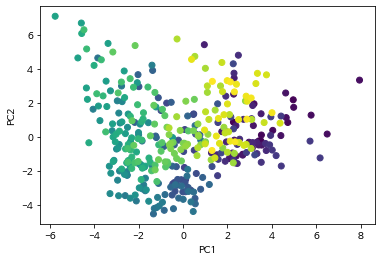

In [39]:
# Principal Component Pattern Plot 1) 2D
plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index) # c: class/cluster 구분이 있는 경우 class/cluster로 설정하여 색깔에 따라 class/cluster 확인
plt.xlabel('PC1')
plt.ylabel('PC2')

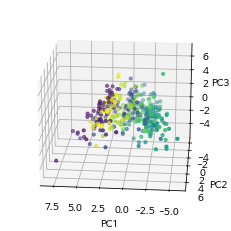

In [40]:
# Principal Component Pattern Plot 2) 3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = X_pp.index)

#plt.figure(figsize=(10,10))
ax.view_init(elev = 20, azim = 95)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


### Biplot

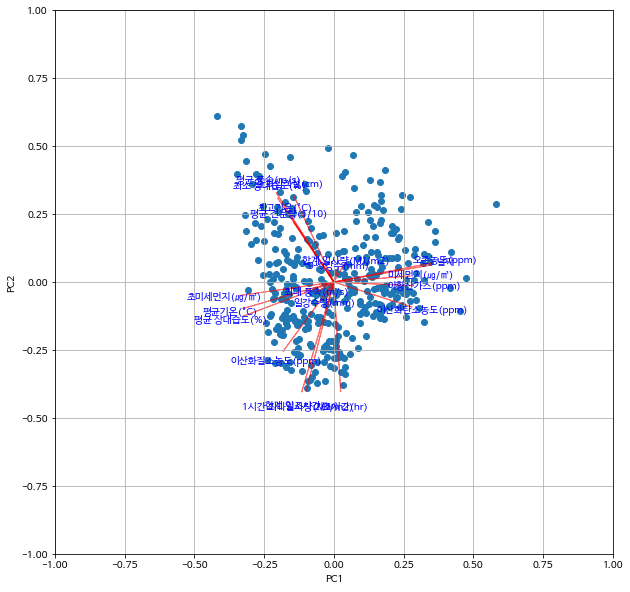

In [41]:
# Principal Component Pattern Plot 3) biplot
def biplot(score,coeff,pcax,pcay,labels=None):
  plt.figure(figsize=(10,10))

  pca1=pcax-1
  pca2=pcay-1
  xs = score.iloc[:,pca1]
  ys = score.iloc[:,pca2]
  n=coeff.shape[0]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='b', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='b', ha='center', va='center')
  plt.xlim(-1,1) # 범위는 최대 1에서 최소 -1
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

biplot(X_pp, pca.components_.T, 1, 2, labels=data.columns)

# FA

## Step 1. 요인 분석 전 검정

### KMO Test

In [42]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.78 : 요인분석을 위한 변수 선정이 적당함

/usr/local/lib/python3.9/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7808773625994307

### Bartlett Test

In [43]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(9522.413837976814, 0.0)

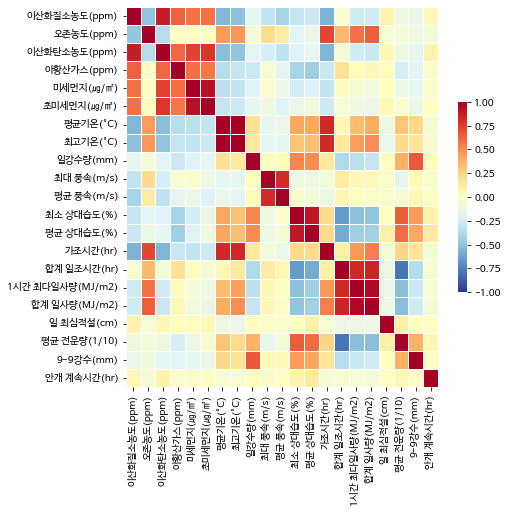

In [44]:
# 변수들간의 상관관계를 corr()로 확인
fig, ax = plt.subplots( figsize=(7,7) )
sns.heatmap(data_scale.corr(), 
            cmap = 'RdYlBu_r', 
            # annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## Step 2. Factor 개수 선택

- PCA에서 6개의 factors를 선택하였으므로, FA에서도 동일하게 6개의 factors 선택

## Step 3. Factor Analysis

### varimax

In [45]:
fa = FactorAnalyzer(n_factors=6, rotation = "varimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [46]:
# 세로 혹은 가로로 해석 (하나의 변수가 어떤 factor 로 구성되어 있는지 / 하나의 factor가 어떤 변수로 구성되어 있는지)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
이산화질소농도(ppm),-0.518290,0.626750,-0.032745,-0.405726,-0.040059,-0.102784
오존농도(ppm),0.719259,0.018330,0.208271,0.240377,-0.120983,-0.316483
이산화탄소농도(ppm),-0.417806,0.797772,-0.039601,-0.256930,-0.068200,0.061496
아황산가스(ppm),-0.192019,0.633268,0.120577,-0.109805,-0.104095,-0.283141
미세먼지(㎍/㎥),-0.072057,0.924879,-0.014334,0.034175,-0.093821,-0.037100
초미세먼지(㎍/㎥),-0.024515,0.952416,-0.076820,-0.028323,-0.076231,0.044356
평균기온(°C),0.847823,-0.268093,0.073395,-0.163838,0.179873,0.211969
최고기온(°C),0.842768,-0.235250,0.171392,-0.187832,0.144067,0.170315
일강수량(mm),0.066941,-0.146708,-0.238895,0.031771,0.669428,0.138031
최대 풍속(m/s),-0.050518,-0.059888,0.089696,0.854641,0.038798,-0.109810


<Axes: >

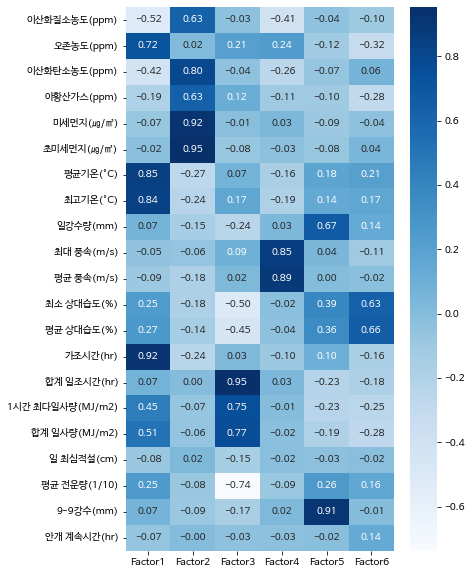

In [47]:
# 시각화 1)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: >

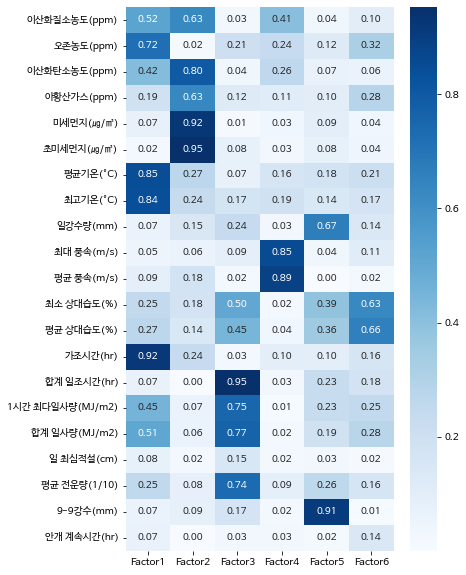

In [48]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

FA 결과, 각각의 Factor를 다음과 같이 분류할 수 있음
- Factor 1 : 기온
- Factor 2 : 미세먼지 및 대기질
- Factor 3 : 일조시간 및 일사량
- Factor 4 : 풍속
- Factor 5 : 강수
- Factor 6 : 습도

모든 Factor에서 높은 적재량을 가진 특징적인 값이 존재하므로, 6개의 요인 모두 최종 선택

In [49]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,3.979419,3.509280,3.270060,1.909546,1.880331,1.381277
Proportion Var,0.189496,0.167109,0.155717,0.090931,0.089540,0.065775
Cumulative Var,0.189496,0.356605,0.512322,0.603253,0.692792,0.758567


### oblimax

In [50]:
fa = FactorAnalyzer(n_factors=6, rotation = "oblimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=6, rotation='oblimax', rotation_kwargs={})

In [51]:
# 세로 혹은 가로로 해석 (하나의 변수가 어떤 factor 로 구성되어 있는지 / 하나의 factor가 어떤 변수로 구성되어 있는지)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
이산화질소농도(ppm),-0.830013,-0.107740,0.314189,-0.130083,0.144525,-0.047340
오존농도(ppm),0.438022,0.533310,0.172939,0.412211,-0.122591,-0.206129
이산화탄소농도(ppm),-0.843094,-0.126388,0.367361,0.090075,0.049423,0.121340
아황산가스(ppm),-0.621542,0.212115,0.259337,0.181592,0.093951,-0.123019
미세먼지(㎍/㎥),-0.679075,0.053423,0.401808,0.490201,-0.040949,0.068739
초미세먼지(㎍/㎥),-0.653557,-0.027043,0.493805,0.484429,-0.072816,0.102437
평균기온(°C),0.825744,0.085259,0.443324,0.060142,-0.031494,0.099626
최고기온(°C),0.783849,0.190565,0.464266,0.042376,-0.006754,0.109097
일강수량(mm),0.328182,-0.505788,0.003983,0.126764,0.414145,-0.012059
최대 풍속(m/s),0.071574,0.146659,-0.645580,0.558781,0.011975,0.048729


<Axes: >

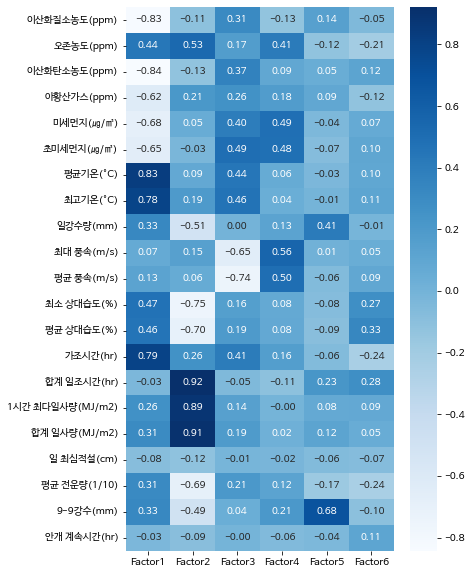

In [52]:
# 시각화 1)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: >

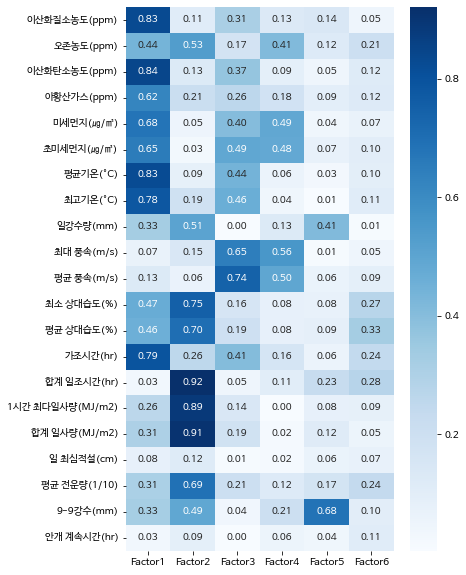

In [53]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

FA 결과, 각각의 Factor를 다음과 같이 분류할 수 있음
- Factor 1 : 기온, 미세먼지 및 대기질 
- Factor 2 : 습도, 일조시간 및 일사량
- Factor 3 : 풍속
- Factor 4 : -
- Factor 5 : 강수
- Factor 6 : -

Varimax 방식에 비해 각 factor의 원인이 명확히 분류되지 않으며, factors 4 / 6에서는 특징적인 값이 보이지 않음

In [54]:
fa = FactorAnalyzer(n_factors=4, rotation = "oblimax")
fa.fit(data_scale)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor5'],
                                 index=data_scale.columns)
#fa_result_loading

fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor5'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor5
SS Loadings,5.683887,4.896586,2.428030,1.363895
Proportion Var,0.270661,0.233171,0.115620,0.064947
Cumulative Var,0.270661,0.503832,0.619452,0.684400


### promax

In [55]:
fa = FactorAnalyzer(n_factors=6, rotation = "promax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [56]:
# 세로 혹은 가로로 해석 (하나의 변수가 어떤 factor 로 구성되어 있는지 / 하나의 factor가 어떤 변수로 구성되어 있는지)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
이산화질소농도(ppm),-0.436179,0.441998,0.011808,-0.363878,0.114347,-0.095694
오존농도(ppm),0.811340,0.194969,-0.018642,0.210534,-0.159834,-0.343653
이산화탄소농도(ppm),-0.300699,0.737049,0.045973,-0.158341,0.023141,0.146558
아황산가스(ppm),-0.089916,0.561232,0.053555,-0.074493,0.045847,-0.271628
미세먼지(㎍/㎥),0.103374,1.019976,-0.021938,0.154122,-0.045100,0.054465
초미세먼지(㎍/㎥),0.172726,1.071953,-0.065318,0.102961,-0.062734,0.141110
평균기온(°C),0.886329,-0.027247,0.091266,-0.182334,0.028447,0.195478
최고기온(°C),0.878519,-0.009088,0.184003,-0.209926,0.021907,0.168421
일강수량(mm),-0.034636,-0.048408,-0.050653,0.034064,0.717546,-0.013821
최대 풍속(m/s),-0.151408,0.087024,0.067274,0.888885,0.066493,-0.069608


<Axes: >

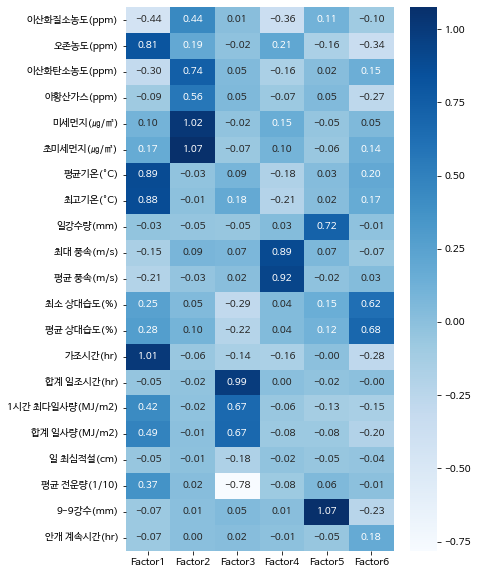

In [57]:
# 시각화 1)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: >

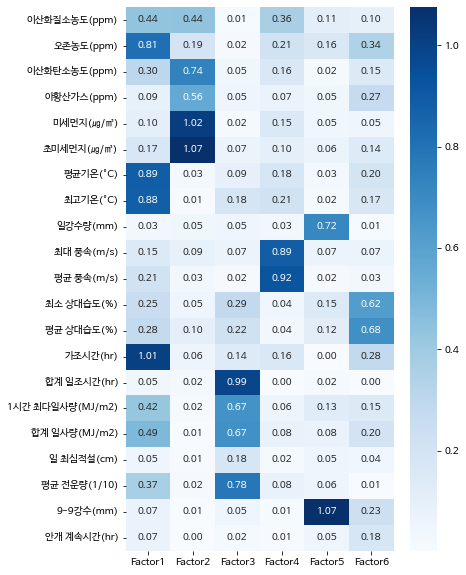

In [58]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

FA 결과, 각각의 Factor를 다음과 같이 분류할 수 있음
- Factor 1 : 기온
- Factor 2 : 미세먼지 및 대기질 
- Factor 3 : 일조시간 및 일사량
- Factor 4 : 풍속
- Factor 5 : 강수
- Factor 6 : 습도

- varimax와 동일한 결과를 보임

In [59]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,4.336382,3.310398,2.733708,2.009395,1.791939,1.390963
Proportion Var,0.206494,0.157638,0.130177,0.095685,0.085330,0.066236
Cumulative Var,0.206494,0.364132,0.494309,0.589994,0.675325,0.741561


### oblimin

In [60]:
fa = FactorAnalyzer(n_factors=6, rotation = "oblimin")
fa.fit(data_scale)

FactorAnalyzer(n_factors=6, rotation='oblimin', rotation_kwargs={})

In [61]:
# 세로 혹은 가로로 해석 (하나의 변수가 어떤 factor 로 구성되어 있는지 / 하나의 factor가 어떤 변수로 구성되어 있는지)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
이산화질소농도(ppm),0.475137,-0.351320,-0.033536,-0.282450,-0.392307,0.066290
오존농도(ppm),0.126255,0.839066,0.066481,-0.133748,0.227307,-0.065973
이산화탄소농도(ppm),0.732072,-0.331806,0.026780,-0.017452,-0.216875,-0.005992
아황산가스(ppm),0.557554,0.042531,0.046108,-0.358975,-0.098706,0.044518
미세먼지(㎍/㎥),0.960908,0.080476,0.006416,0.001630,0.083386,-0.023234
초미세먼지(㎍/㎥),1.003555,0.091916,-0.027473,0.102557,0.026215,-0.037655
평균기온(°C),-0.096850,0.577657,0.189823,0.473932,-0.159068,0.075958
최고기온(°C),-0.075147,0.573183,0.282037,0.435696,-0.183849,0.068753
일강수량(mm),-0.055300,-0.032108,-0.059976,0.126672,0.047120,0.642143
최대 풍속(m/s),0.063435,0.021397,0.056490,-0.046797,0.870611,0.077445


<Axes: >

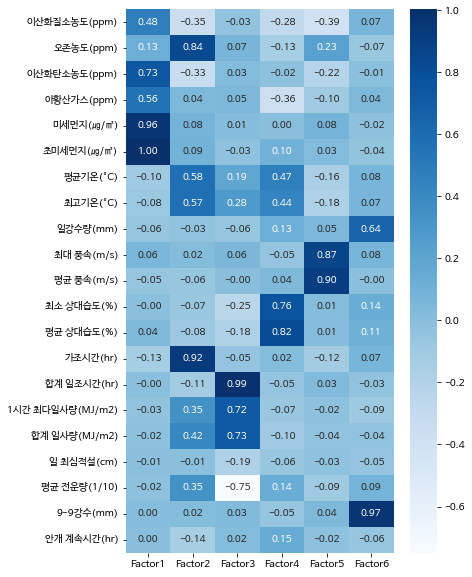

In [62]:
# 시각화 1)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: >

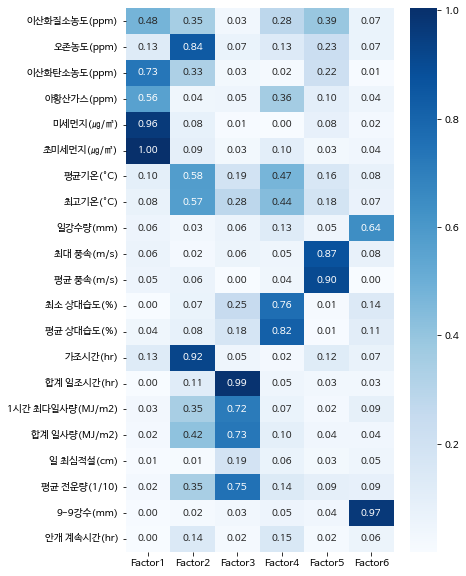

In [63]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

FA 결과, 각각의 Factor를 다음과 같이 분류할 수 있음
- Factor 1 : 미세먼지 및 대기질 
- Factor 2 : 기온
- Factor 3 : 일조시간 및 일사량
- Factor 4 : 습도
- Factor 5 : 풍속
- Factor 6 : 강수

- varimax와 비교했을 때 factor가 의미하는 요인은 동일하지만, factor의 순서가 변함

In [64]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,3.063827,2.929780,2.847583,1.982991,1.935065,1.432655
Proportion Var,0.145897,0.139513,0.135599,0.094428,0.092146,0.068222
Cumulative Var,0.145897,0.285410,0.421009,0.515437,0.607583,0.675805


### quartimax

In [65]:
fa = FactorAnalyzer(n_factors=6, rotation = "quartimax")
fa.fit(data_scale)

FactorAnalyzer(n_factors=6, rotation='quartimax', rotation_kwargs={})

In [66]:
# 세로 혹은 가로로 해석 (하나의 변수가 어떤 factor 로 구성되어 있는지 / 하나의 factor가 어떤 변수로 구성되어 있는지)
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)
fa_result_loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
이산화질소농도(ppm),0.047892,-0.552481,0.588989,-0.421097,0.047625,-0.072582
오존농도(ppm),0.327402,0.691920,0.066675,0.273860,-0.078072,-0.249281
이산화탄소농도(ppm),-0.009950,-0.467421,0.767058,-0.273032,-0.016123,0.072455
아황산가스(ppm),0.265130,-0.244436,0.614037,-0.109813,0.018368,-0.189786
미세먼지(㎍/㎥),0.056154,-0.149858,0.918139,0.033922,-0.045243,-0.018906
초미세먼지(㎍/㎥),-0.034848,-0.101400,0.951795,-0.028052,-0.057473,0.026048
평균기온(°C),-0.082742,0.893127,-0.208014,-0.134597,0.069705,0.171543
최고기온(°C),0.030382,0.887880,-0.178777,-0.158825,0.063879,0.171755
일강수량(mm),-0.440328,0.122044,-0.147657,0.042906,0.559006,0.079732
최대 풍속(m/s),0.111264,-0.074615,-0.073584,0.854345,0.062622,-0.031154


<Axes: >

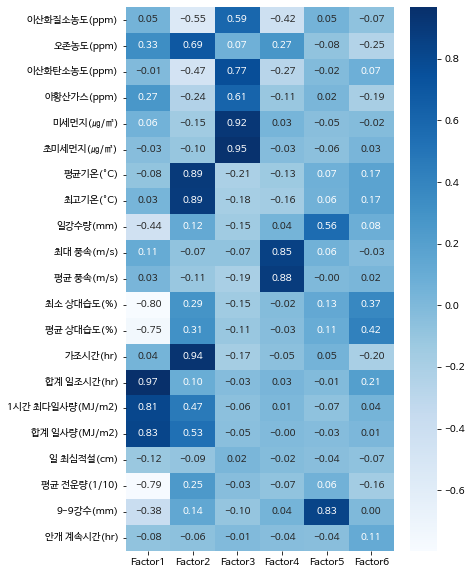

In [67]:
# 시각화 1)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: >

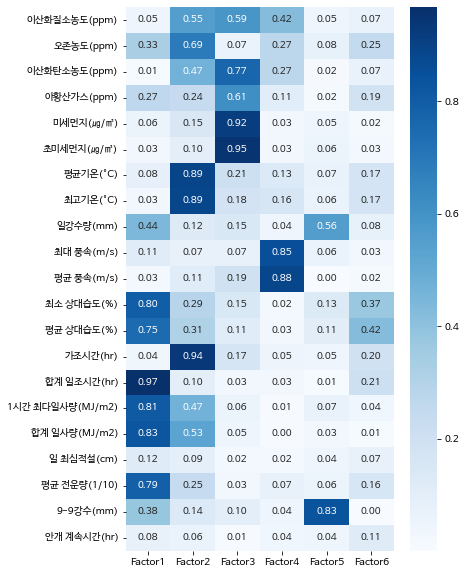

In [68]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

FA 결과, 각각의 Factor를 다음과 같이 분류할 수 있음
- Factor 1 : 일조시간 및 일사량, 습도
- Factor 2 : 기온
- Factor 3 : 미세먼지 및 대기질
- Factor 4 : 풍속
- Factor 5 : 강수량
- Factor 6 : -

- varimax와 비교했을 때 일조시간과 습도가 모두 Factor 1을 설명하여 Factor 6을 설명하는 유의미한 변수가 존재하지 않음

In [69]:
fa = FactorAnalyzer(n_factors=5, rotation = "quartimax")
fa.fit(data_scale)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'],
                                 index=data_scale.columns)

fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,4.687127,4.354992,3.277082,1.910882,0.955844
Proportion Var,0.223197,0.207381,0.156052,0.090994,0.045516
Cumulative Var,0.223197,0.430577,0.586629,0.677623,0.723139


## Step 4. Results

- 가장 분산을 잘 설명하는(75.86%) Varimax rotation 사용


In [70]:
fa = FactorAnalyzer(n_factors=6, rotation = "varimax")
fa.fit(data_scale)

fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'],
                                 index=data_scale.columns)


In [71]:
fa.get_factor_variance() # 각 factor의 variance
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,3.979419,3.509280,3.270060,1.909546,1.880331,1.381277
Proportion Var,0.189496,0.167109,0.155717,0.090931,0.089540,0.065775
Cumulative Var,0.189496,0.356605,0.512322,0.603253,0.692792,0.758567


- Factor 1 : Temperature (기온)
- Factor 2 : FineDust (미세먼지 및 대기질)
- Factor 3 : Sunshine (일조시간 및 일사량)
- Factor 4 : Wind (풍속)
- Factor 5 : Rain (강수)
- Factor 6 : Humidity (습도)

In [72]:
fa.fit_transform(data_scale).shape

(365, 6)

In [73]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f, 
                    columns = ['Temperature','FineDust','Sunshine','Wind','Rain', 'Humidity'], 
                    index = data_scale.index)
X_ff

,Temperature,FineDust,Sunshine,Wind,Rain,Humidity
0,-1.760737,-0.218244,0.208757,0.352227,-0.162400,0.280749
1,-1.882598,-0.251930,0.350146,-0.598990,-0.217219,-0.492100
2,-2.029454,-0.346760,0.335377,-1.240361,-0.161482,-0.709403
3,-1.521864,1.147924,-0.660044,-1.588139,-0.117820,0.028627
4,-1.318566,0.518779,0.267412,0.456086,-0.308061,-0.347788
...,...,...,...,...,...,...
360,-1.642482,-0.306126,0.508599,0.189706,-0.224694,0.038111
361,-1.551791,-0.026201,-0.226642,-0.374405,-0.243240,0.118795
362,-1.069277,0.219879,-1.666225,0.707326,-0.331706,-0.194285
363,-1.011370,0.136085,-1.685760,1.940966,-0.393466,0.434639


Text(0, 0.5, 'FineDust')

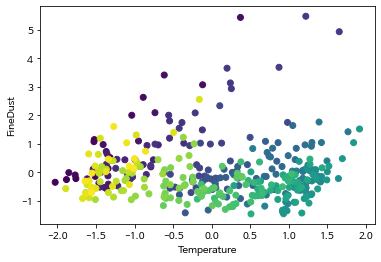

In [74]:
# Score Plot 1
plt.scatter(x=X_ff['Temperature'],y=X_ff['FineDust'], c=X_ff.index)
plt.xlabel('Temperature')
plt.ylabel('FineDust')

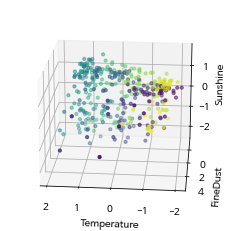

In [75]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_ff['Temperature'],X_ff['FineDust'],X_ff['Sunshine'], s=10, c = X_ff.index)
ax.set_xlabel('Temperature')
ax.set_ylabel('FineDust')
ax.set_zlabel('Sunshine')
ax.view_init(elev=20, azim=95)
plt.show()

In [76]:
# 신뢰도계수 (Cronbach's alpha 계산)
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems/(nitems-1))*(1-(itemvars.sum()/tscores.var(ddof=1)))

In [77]:
df.columns

Index(['이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)',
       '초미세먼지(㎍/㎥)', '평균기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)',
       '평균 풍속(m/s)', '최소 상대습도(%)', '평균 상대습도(%)', '가조시간(hr)', '합계 일조시간(hr)',
       '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '일 최심적설(cm)', '평균 전운량(1/10)',
       '9-9강수(mm)', '안개 계속시간(hr)'],
      dtype='object')

In [78]:
factors = ['Temperature','FineDust','Sunshine','Wind','Rain', 'Humidity']
factors_items_dict={}

factors_items_dict[factors[0]] = ['오존농도(ppm)','평균기온(°C)','최고기온(°C)','가조시간(hr)']
factors_items_dict[factors[1]] = ['이산화질소농도(ppm)','이산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)']
factors_items_dict[factors[2]] = ['합계 일조시간(hr)','1시간 최다일사량(MJ/m2)','합계 일사량(MJ/m2)','평균 전운량(1/10)']
factors_items_dict[factors[3]] = ['최대 풍속(m/s)','평균 풍속(m/s)']
factors_items_dict[factors[4]] = ['일강수량(mm)','9-9강수(mm)']
factors_items_dict[factors[5]] = ['최소 상대습도(%)', '평균 상대습도(%)']

factors_items_dict

{'Temperature': ['오존농도(ppm)', '평균기온(°C)', '최고기온(°C)', '가조시간(hr)'],
 'FineDust': ['이산화질소농도(ppm)',
  '이산화탄소농도(ppm)',
  '아황산가스(ppm)',
  '미세먼지(㎍/㎥)',
  '초미세먼지(㎍/㎥)'],
 'Sunshine': ['합계 일조시간(hr)',
  '1시간 최다일사량(MJ/m2)',
  '합계 일사량(MJ/m2)',
  '평균 전운량(1/10)'],
 'Wind': ['최대 풍속(m/s)', '평균 풍속(m/s)'],
 'Rain': ['일강수량(mm)', '9-9강수(mm)'],
 'Humidity': ['최소 상대습도(%)', '평균 상대습도(%)']}

In [79]:
for key, value in factors_items_dict.items():
    print(key)
    print(CronbachAlpha(data_scale[value]))
    print()
    
# Cronbach's Alpha값이 0.7 이상이면 good/ acceptable, 0.9 이상이면 excellent

Temperature
0.908648960016989

FineDust
0.9177120574354731

Sunshine
0.381401843036471

Wind
0.8996742390902774

Rain
0.8036690314200539

Humidity
0.9456331525643407

